# The Bracketing Methods

## Tools for Ploting

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import _rebuild
from matplotlib.collections import EventCollection
_rebuild()
plt.rcParams['font.sans-serif'] = ['STFangsong']

def plot_stepwise(f, opt_f, low, high, n_img=None):
    x_arr = np.linspace(low, high, 100)
    y_arr = f(x_arr)
    # performing function
    trace_rts = opt_f(f)
    # ploting
    fig, axs = plt.subplots(1, len(trace_rts), figsize=(30,6), dpi=100)
    for i in range(len(trace_rts)):
        axs[i].plot(x_arr, y_arr)
        axs[i].scatter(trace_rts[i][0], trace_rts[i][1])
        axs[i].set_xlabel('x', ha='left', va = 'top', fontsize = 9)
        axs[i].set_ylabel('y', ha='left', va = 'top', fontsize = 9)
        xevents = EventCollection(list(trace_rts[i][0]), color='tab:orange', linelength=0.05, lineoffset=axs[i].get_ylim()[0])
        axs[i].add_collection(xevents)
        axs[i].annotate('a', xy=(trace_rts[i][0][0], axs[i].get_ylim()[0]), ha='left', va='top', fontsize=14)
        axs[i].annotate('b', xy=(trace_rts[i][0][1], axs[i].get_ylim()[0]), ha='left', va='top', fontsize=14)
        axs[i].set_title('step=%d' % i)


## (1) Golden Section Algorithm

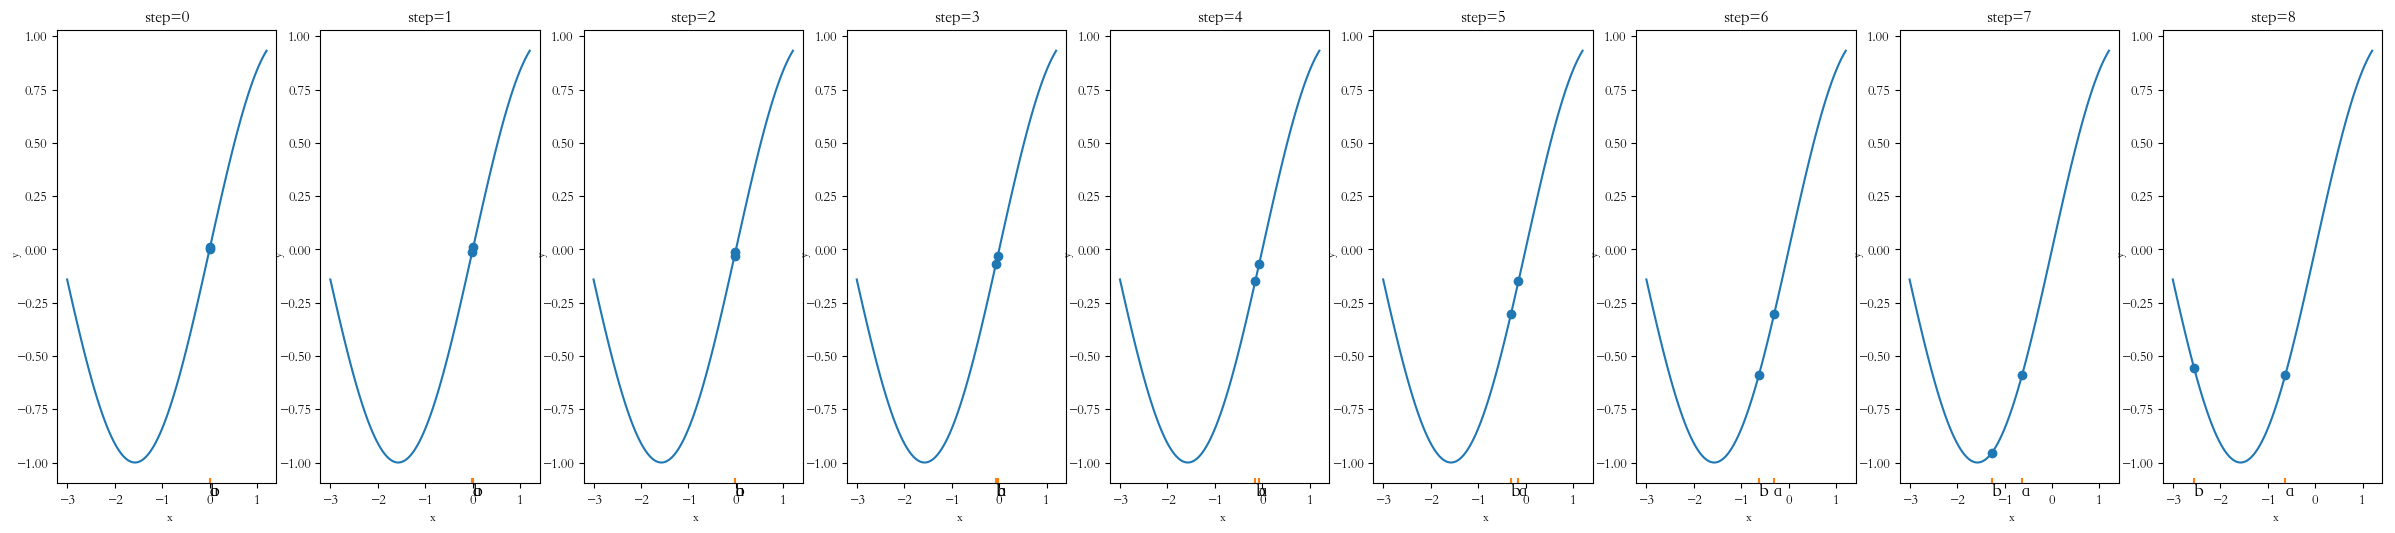

In [82]:
# Finding an Initial Bracket
def bracket_minimum(f, x=0, s=1e-2, k=2.0):
    trace_rts = []
    a, ya = x, f(x)
    b, yb = a+s, f(a+s)
    if yb > ya:
        a, b = b, a
        ya, ya = yb, ya
        s = -s
    trace_rts.append(((a,b), (ya,yb)))
    while True:
        c, yc = b+s, f(b+s)
        if yc > yb:
#             rt = (a,c) if a<c else (c,a)
            trace_rts.append(((a,c), (ya,yc)))
#             return rt
            return trace_rts
        a, ya, b, yb = b, yb, c, yc
        trace_rts.append(((a,b), (ya,yb)))
        s *= k

# test
plot_stepwise(np.sin, bracket_minimum, -3, 1.2)